<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10.3 Geostatistics
Kriging is a widely used method for interpolation in hydrology apart from other areas. The advan- tage of Kriging over other interpolation method e.g. linear interpolation, radial basis function and spline etc. is that Kriging methodology provides a way to estimate the parameter of interpolation and also provides the uncertainty in the interpolated values. The Kriging methodology involves two steps: 

(i) estimation of variogram and fitting a theortical variogram to it, and 

(ii) performing the interpolation. 

The empirical variogram reveals many interesesting thing about the data and sampling intervals. It is worthwhile to look into these aspects. So, first we begin by generating different type of synthetic dataset to understand the variogram. The example taken in this are from the book, ’Introduction to Geostatistics’ by P. K. Kitanidis. 

### 10.3.1 Variogram

A variogram allow us to understand the spatial variability in a variable. 

In variogram computation, we take pairs of a variable at different locations and compute the expected value (average) of the square of difference in the variable at those location:

$\gamma = \frac{1}{2} E\left[ (Z_1 - Z_2,)^2 \right] $, \\
where, $\gamma$ is semi-variogram, $Z_1$ is the value of a variable $Z$ at location $1$ and $Z_2$ is the value of a variable $Z$ at location $2$.

A typtical behaviour of semi-variogram is shown in below figure.
![Flow chart](https://drive.google.com/uc?export=view&id=1C3MEsPKfLKsZkXStJ1S09yA_mDEjFnjE)

Let us generage some synthetic data and try to understand the behaviour of each components of the semi-variogram.



In [91]:
import numpy as np
n = 100
x = np.random.rand(n,) # synthetic location in 1-D
z = np.random.rand(n,) # synthetic value of a variable at the location defined in x

Let us plot this data and see how our synthetic data looks like.

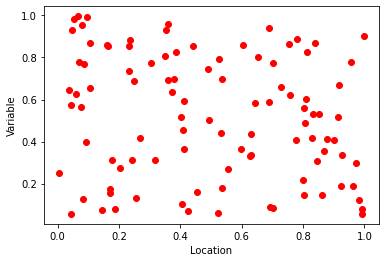

In [92]:
import matplotlib.pyplot as plt

plt.plot(x,z,'ro')
plt.xlabel("Location")
plt.ylabel("Variable")
plt.show()

As we can see, the variable is uniformly distributed random variable. Let us see how the variable for a random data looks like. First compute the semi-variogram.

In [93]:
sv = [] # empty variable for semi-variogram
lag = [] # empty variable for lag (distance between each pair)
# We are intentionally not trying to optimize the code, so that it is easier to 
# understand the stuff. A more efficient way would have been to define a 
# variable with a pre-defined length/size.

for i in range(n):
  for j in range(i+1,n):
    sv.append(0.5*(z[i]-z[j])**2)
    lag.append(np.abs(x[i]-x[j]))
  #print(i)
sv = np.array(sv)
lag = np.array(lag)
print(len(sv))

4950


Let us plot the semi-variogram and see how it looks like.

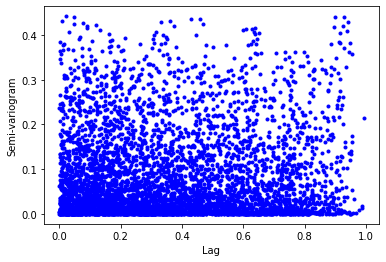

In [94]:
plt.plot(lag,sv,'.b')
plt.xlabel("Lag")
plt.ylabel("Semi-variogram")
plt.show()

It looks too clutterred. Let us bin the data and take expected value to make sense of experimental (coming from observed data) semi-variogram. 

[990, 869, 722, 618, 540, 475, 398, 242, 96]


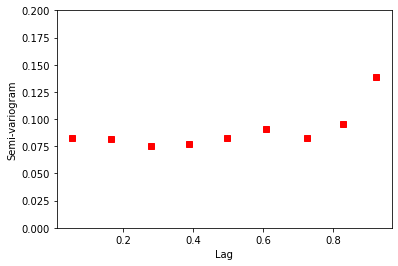

In [95]:
bins = np.linspace(0, 1, 10)
digitized = np.digitize(lag, bins)
lag_means = [lag[digitized == i].mean() for i in range(1, len(bins))]
sv_means = [sv[digitized == i].mean() for i in range(1, len(bins))]
count = [np.sum(digitized == i) for i in range(1, len(bins))]

print(count) # print to see how many pairs of data we have at each lag

plt.plot(lag_means,sv_means, 'rs')
plt.xlabel("Lag")
plt.ylabel("Semi-variogram")
plt.ylim(0,0.2)
plt.show()

We can learn few thing from this simple excersize. We can see that number of pairs reduce as the lag increases. Sometime we may want to cut the data once lag is relatively large (very few data points) as data at larger distance may show spurious behaviour. 

When we look at the semi-variogram, all the data are around 0.08. First thing we can learn is that in the case of random data, semi-variogram is nearly similar (remain nearly same irrespective of the lag). 

Let us look at why we are getting semi-variogram equal to 0.08. Let us compute the variable of our data (variable $z$).

In [96]:
print(np.var(z))

0.08232813183501564


We can see that the variance of data is approximately equal to 0.08 (theortically it should be equal to 1/12). 

We can also say that range is nearly 0 in this case and sill is nearly equal to the variance. 

Now let us try to generate synthetic variables having some patterns. 

Let us try another variable that has variability at larger scaler than our sampling. We keep the same sampling, and change the variability of the signal in the following way:

$z(x) = \cos(2x/0.001)$

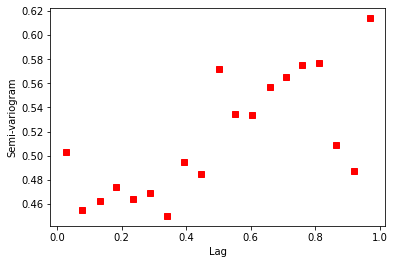

In [97]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.random.rand(n) # uniformly distributed x
z = np.cos(2*np.pi*x/0.001)

# compute and plot the variogram
sv = [] # empty variable for semi-variogram
lag = [] # empty variable for lag (distance between each pair)

for i in range(n):
  for j in range(i+1,n):
    sv.append(0.5*(z[i]-z[j])**2)
    lag.append(np.abs(x[i]-x[j]))
sv = np.array(sv)
lag = np.array(lag)

bins = np.linspace(0, 1, 20)
digitized = np.digitize(lag, bins)
lag_means = [lag[digitized == i].mean() for i in range(1, len(bins))]
sv_means = [sv[digitized == i].mean() for i in range(1, len(bins))]
count = [np.sum(digitized == i) for i in range(1, len(bins))]

plt.plot(lag_means,sv_means, 'rs')
plt.xlabel("Lag")
plt.ylabel("Semi-variogram")
plt.show()

The variogram is shown in above figure. The variogram looks nearly flat. It means that the behaviour is same at any lag distance, or the variable (z) has same variability at any scale. This variogram is showing nearly same behaviour as shown by a random variable, however we know that our data follow a behaviour (i.e. $\sin$). Then why is variogram not showing a pattern? 

To get the answer to this question, let us plot the data.

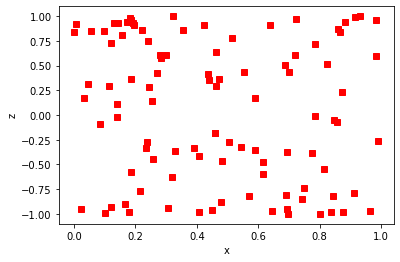

In [98]:
plt.plot(x, z, 'rs')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

We can see that the data in above figure is not showing any pattern. Hence, variogram is not showing any trend.

Let us generate data with a pattern with good sampling. First we plot the data.

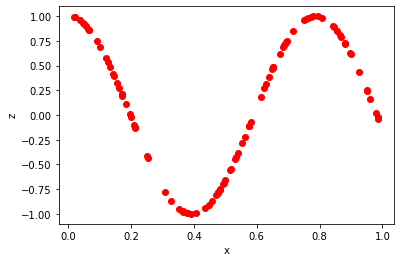

In [99]:
x = np.random.rand(100) # uniformly distributed x
z = np.cos(2*x/0.25)

plt.plot(x,z, 'ro')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

Above figure shows the signal. In the figure, we see that data shows a nice pattern. The pattern is visible because sampling is good enough to capture the variability. 

As we have seen in last example the raw variogram is very cluttered, so we plot only the averaged variogram.

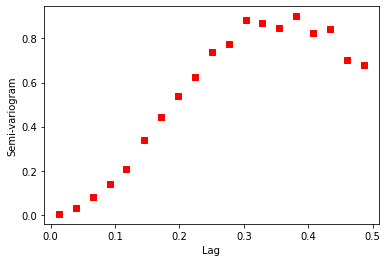

In [100]:
# compute and plot the variogram
sv = [] # empty variable for semi-variogram
lag = [] # empty variable for lag (distance between each pair)

for i in range(n):
  for j in range(i+1,n):
    sv.append(0.5*(z[i]-z[j])**2)
    lag.append(np.abs(x[i]-x[j]))
sv = np.array(sv)
lag = np.array(lag)

bins = np.linspace(0, 0.5, 20)
digitized = np.digitize(lag, bins)
lag_means = [lag[digitized == i].mean() for i in range(1, len(bins))]
sv_means = [sv[digitized == i].mean() for i in range(1, len(bins))]
count = [np.sum(digitized == i) for i in range(1, len(bins))]

plt.plot(lag_means,sv_means, 'rs')
plt.xlabel("Lag")
plt.ylabel("Semi-variogram")
plt.show()

The resulted variogram is shown in above figure. The variogram shows a clear trend. The variability is increasing as the lag distance is increasing. This means that the variability is higher at larger lag distance i.e. the sampling is good enough to capture the variability in the data. 

The variogram is stabilising at around lag distance of 0.3. This distance is approximately the correlation length (after this lag distance data shows no relation to each other).

Let us generate one more signal. Below figure shows the signal. The variable (z) is showing an increasing trend with the increase in x, hence the signal is non-stationary. The variable is also varying rapidly, and any behaviour can not be seen apart from this trend.

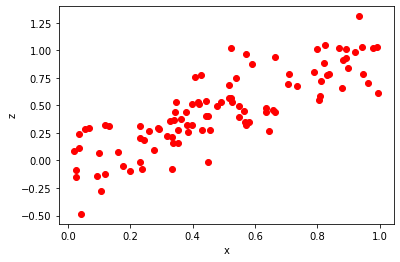

In [101]:
x = np.random.rand(100) # uniformly distributed x
z = x + 0.2*np.random.randn(len(x))

plt.plot(x,z, 'ro')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

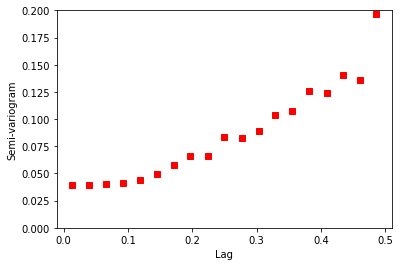

In [102]:
# compute and plot the variogram
sv = [] # empty variable for semi-variogram
lag = [] # empty variable for lag (distance between each pair)

for i in range(n):
  for j in range(i+1,n):
    sv.append(0.5*(z[i]-z[j])**2)
    lag.append(np.abs(x[i]-x[j]))
sv = np.array(sv)
lag = np.array(lag)

bins = np.linspace(0, 0.5, 20)
digitized = np.digitize(lag, bins)
lag_means = [lag[digitized == i].mean() for i in range(1, len(bins))]
sv_means = [sv[digitized == i].mean() for i in range(1, len(bins))]
count = [np.sum(digitized == i) for i in range(1, len(bins))]

plt.plot(lag_means,sv_means, 'rs')
plt.ylim((0,0.2))
plt.xlabel("Lag")
plt.ylabel("Semi-variogram")
plt.show()

Variogram is shown in above figure. The variogram has following two distinct features:

* The variogram is not close to zero at the zero lag distance.
* The variogram is constantly increasing with the lag distance.
* The variogram is not stabilizing.

The above three features have the following interpretations:
* The sampling of data is at larger scale then the variability of the data.
* The extent of the data is not enough to capture the variability of the data. 
* The data is non-stationary.


If we remove the trend in the z, then the data is random and the variogram will look flat.

### 10.3.2 Krigging
Now let us perform the Krigging on the station data to make the map of variable along with uncertainty estimated. First we estimate the empirical variogram, and then fit a theoretical variogram (spherical in this case) to the data by hit and trial. We will be using *ambhas.krige* library for the Krigging. The empircial and theortical fitted variogram is shown in the below figure.

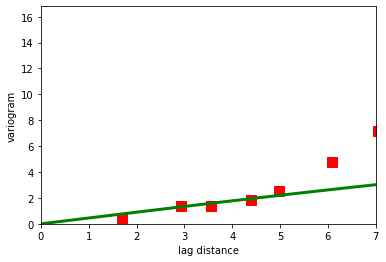

In [103]:
from ambhas import krige

x = np.array([6.8, 4.3, 5.9, 11.6, 5.5, 10.8, 8.6, 12.6, 14.7, 13.9, 9.47, 14.3, 8.9, 11.9, 11.75])
y = np.array([6.4, 5.0, 6.0, 4.9, 2.7, 8.2, 3.9, 6.7, 10.4, 10.9, 5.6,11.0, 7.3, 6.7, 10.8])
z = np.array([10, 11, 12, 9, 12, 8, 10, 8, 6, 6,10, 6, 8, 8, 6])

foo = krige.OK(x,y,z)
DE, GE = foo.variogram(var_type='averaged') 
model_par = {'nugget':0, 'range':20, 'sill':6} 
lags = np.linspace(0,8)
G = foo.vario_model(lags, model_par, 'spherical') 

plt.plot(DE,GE, 'rs', ms=10)
plt.plot(lags, G, 'g', lw=3)
plt.xlabel('lag distance')
plt.ylabel('variogram')
plt.ylim(ymin=0)
plt.xlim((0,7))
plt.show()

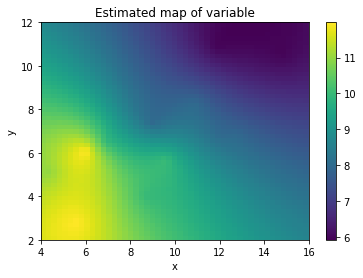

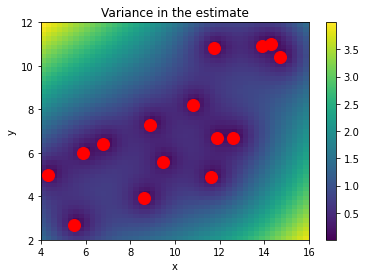

In [104]:
Xg, Yg = np.meshgrid(np.linspace(4,16), np.linspace(2,12)) 
foo.krige(Xg, Yg, model_par, 'spherical')
krig_z = foo.Zg
var_z = foo.s2_k
krig_z.shape = 50,50
var_z.shape = 50,50

plt.pcolor(Xg, Yg, krig_z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Estimated map of variable")
plt.show()

plt.pcolor(Xg, Yg, var_z)
plt.plot(x,y, 'ro', ms=12)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title("Variance in the estimate")
plt.show()

Above figure shows the map of the Krigged values and variance along. In the variance map, location of the original station is also shown. It is evident from the figure that near to the stations the variance of the error is low, and it increases when we move away form the stations, and it reaches a very hight value when there is no station in surroundings.